# Fourier Work
The following are exercises from Mark Newman's Computational Physics book.

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def py_dft(y):
    """ Discrete Fourier Transform for real-valued signals"""
    N = len(y)
    coefs = np.zeros(N//2 + 1, dtype=np.complex)
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        for n in range(N):
            coefs[k] += y[n]*np.exp(const*k*n)
    return coefs

@numba.njit
def dft(y):
    """ Discrete Fourier Transform for real-valued signals
        
        Parameters
        ----------
        y : Sequence[float]
            N evenly-spaced samples
        
        Returns
        -------
        List[complex]
            N//2 + 1 Fourier coefficients"""
    N = len(y)
    coefs = []
    const = -1*np.pi/N*2j
    for k in range(N//2 + 1):
        ck = 0
        for n in range(N):
            ck += y[n]*np.exp(const*k*n)
        coefs.append(ck)
    return coefs
        

<IPython.core.display.Javascript object>


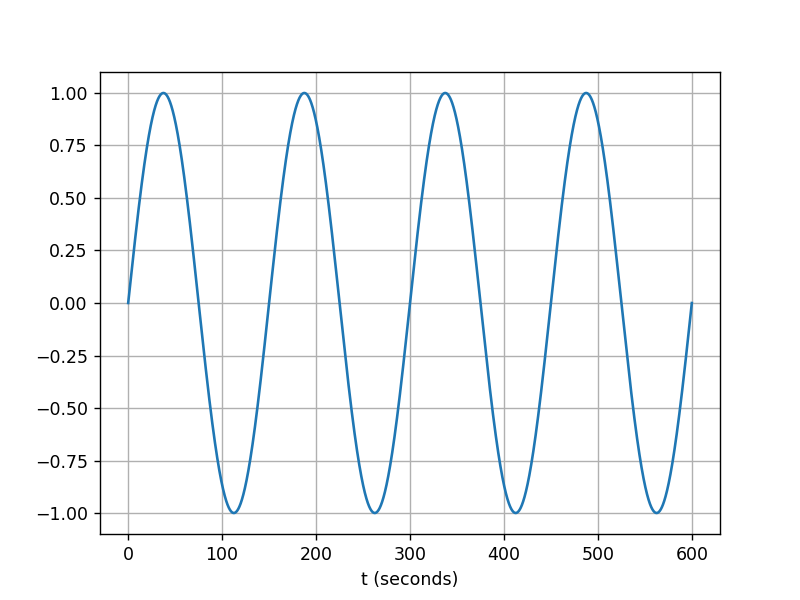

In [4]:
L = 4*150
T = 150
t = np.linspace(0, L, 10000)
y = np.sin(2*np.pi*t/T)
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

To convert to physical units: $x = \frac{n}{N}L$ and $k = \frac{k}{L}$

<IPython.core.display.Javascript object>


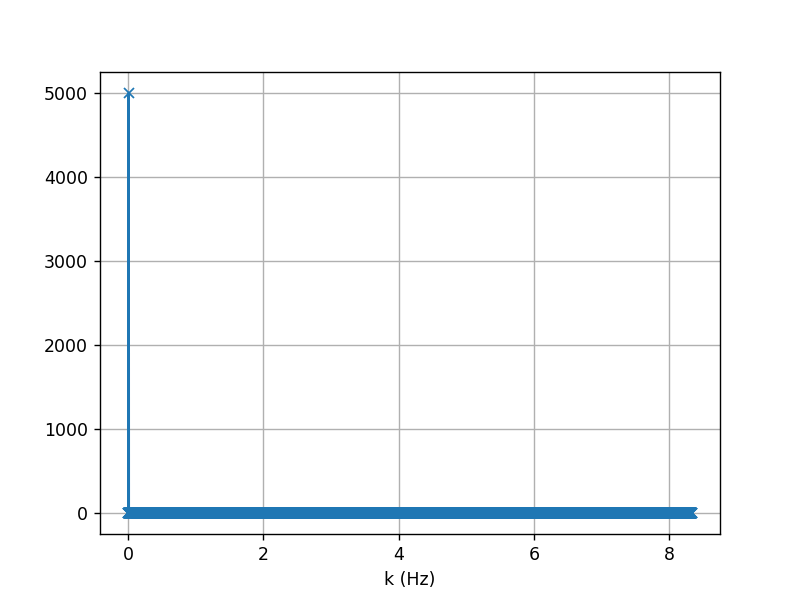

In [5]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
# ax.set_xlim(0,.02)
ax.grid()
ax.set_xlabel("k (Hz)")

Exercise 7.1

a) Single cycle of square-wave with amplitude 1

In [6]:
def square_filter(x):
    return 1 if x >= 0 else -1

<IPython.core.display.Javascript object>


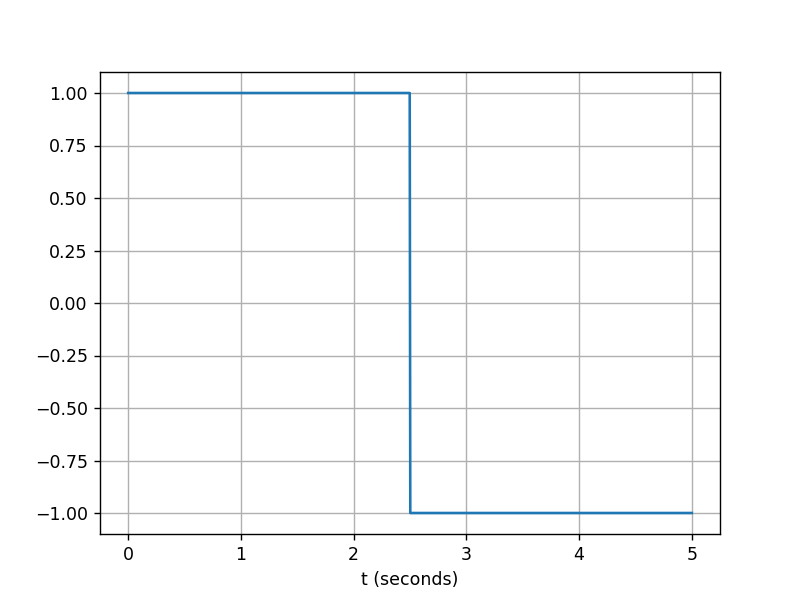

In [7]:
L = 5
t = np.linspace(0,L,1000)
y = [square_filter(i) for i in np.sin(2*np.pi*t/L)]
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

<IPython.core.display.Javascript object>


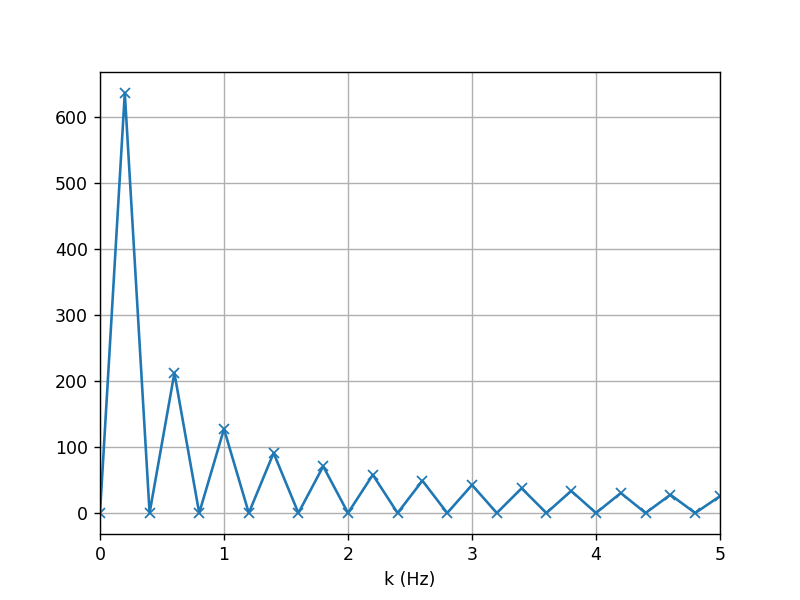

In [8]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0,5)
ax.grid()
ax.set_xlabel("k (Hz)")

b) Sawtooth wave: $y_{n} = n$

<IPython.core.display.Javascript object>


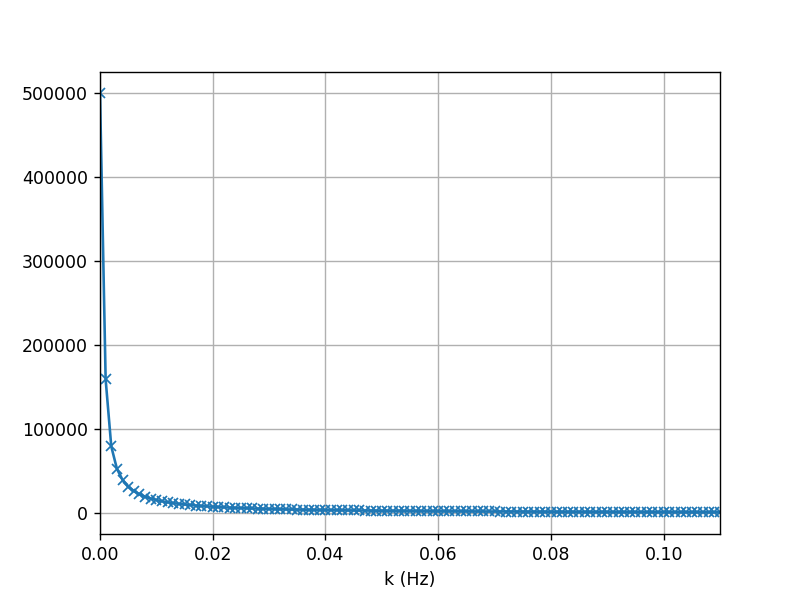

In [9]:
fig,ax = plt.subplots()
y = np.arange(1000)
L = 1000
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0,.11)
ax.grid()
ax.set_xlabel("k (Hz)")

b) modulated sine-wave

<IPython.core.display.Javascript object>


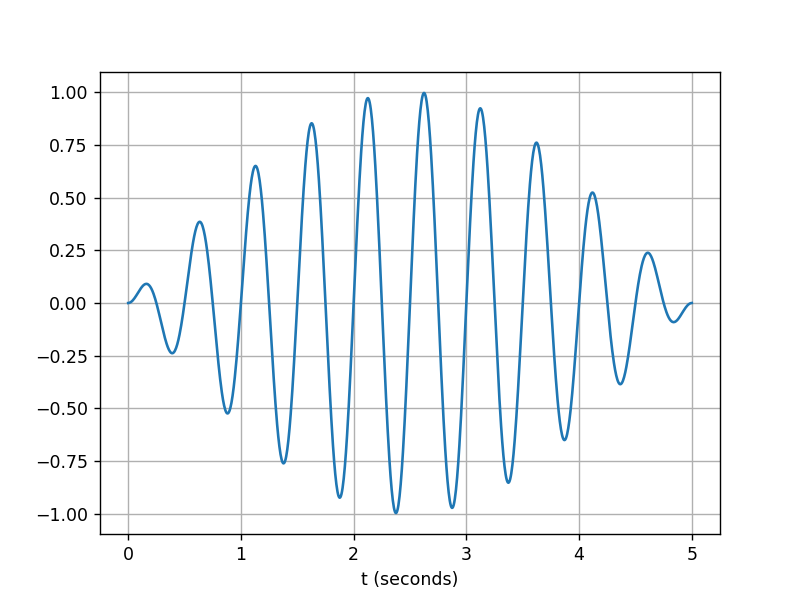

In [10]:
L = 5
t = np.linspace(0, L, 1000)
y = np.sin(np.pi*t/L) * np.sin(20*np.pi*t/L)
fig,ax = plt.subplots()
ax.plot(t,y)
ax.grid()
ax.set_xlabel("t (seconds)")

<IPython.core.display.Javascript object>


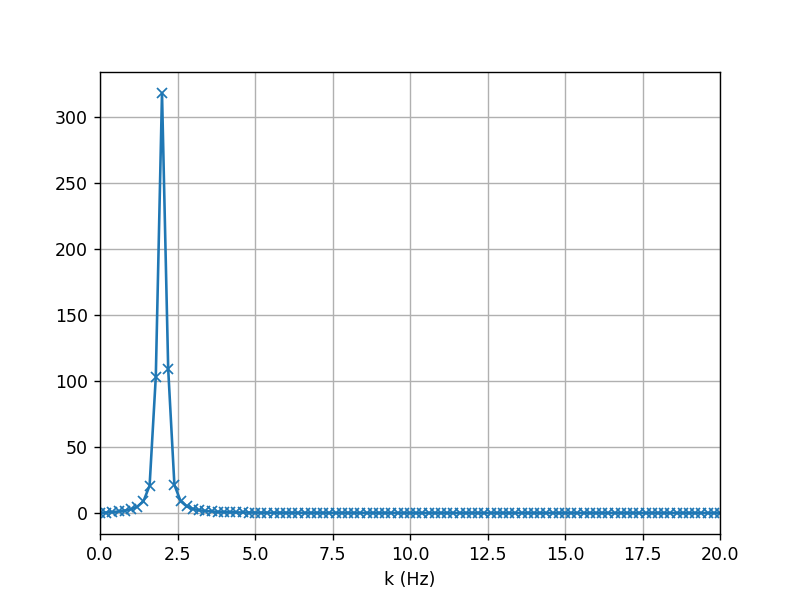

In [11]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/L
ax.plot(k,[np.abs(i) for i in dft(y)], marker='x')
ax.set_xlim(0, 20)
ax.grid()
ax.set_xlabel("k (Hz)")

## Exercise 7.2

In [12]:
with open("data/sunspots.txt", "r") as F:
    data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])

<IPython.core.display.Javascript object>


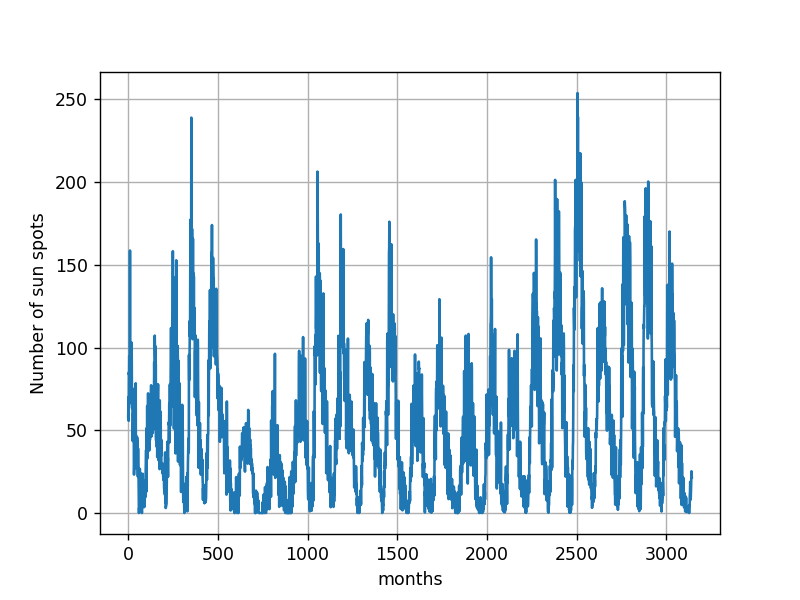

In [13]:
x = data[:, 0]
y = data[:, 1]
fig,ax = plt.subplots()
# ax.set_xlim(0,500)
ax.plot(x,y)
ax.grid()
ax.set_xlabel("months")
ax.set_ylabel("Number of sun spots")

<IPython.core.display.Javascript object>


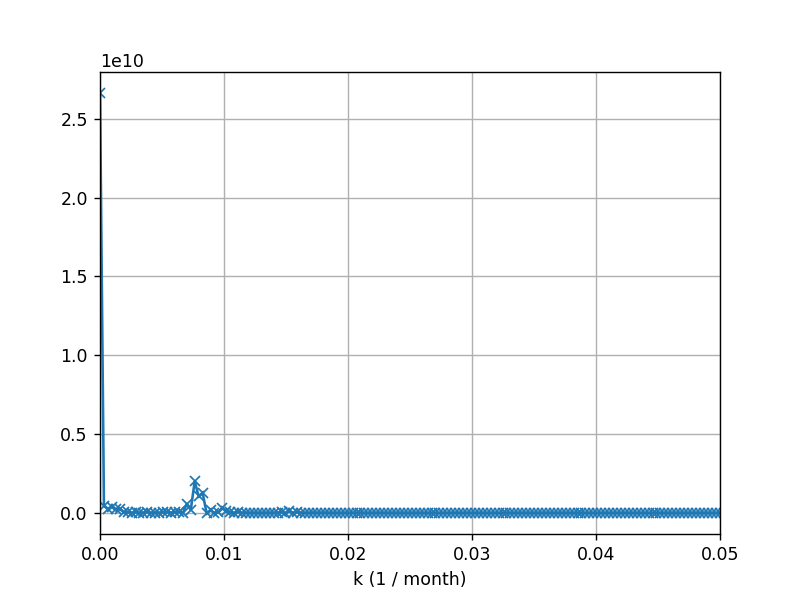

In [14]:
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
ax.plot(k, [np.abs(i)**2 for i in dft(y)], marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel("k (1 / month)")

### Exercise 7.3: Fourier transforms of musical instruments

<IPython.core.display.Javascript object>


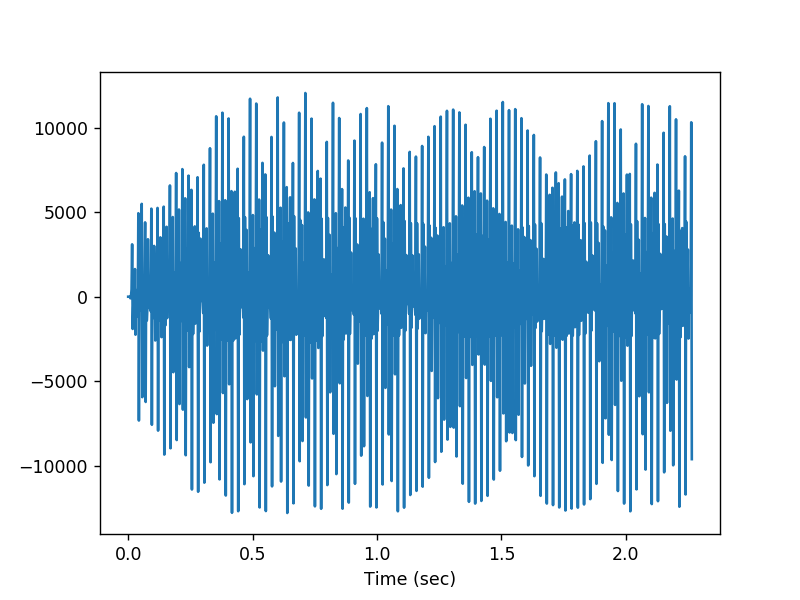

In [43]:
with open("data/trumpet.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
t = np.arange(len(data)) / 44100
ax.plot(t[::100], data[::100])
ax.set_xlabel("Time (sec)")

<IPython.core.display.Javascript object>


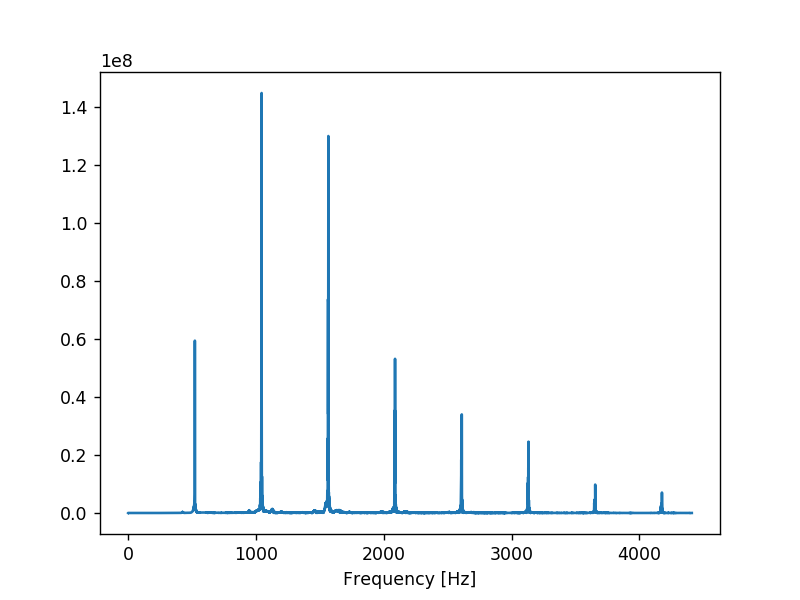

In [44]:
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_xlabel("Frequency [Hz]")

In [42]:
k[:10000][np.argsort(np.abs(ck[:10000]))]

array([ 3755.997,  4297.545,  1436.778, ...,  1565.55 ,  1565.991,
        1043.847])

<IPython.core.display.Javascript object>


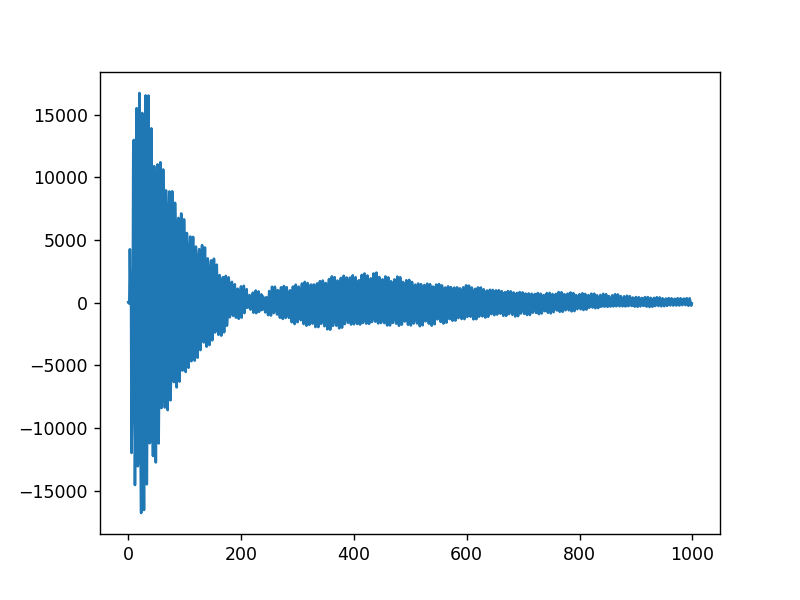

In [45]:
with open("data/piano.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data[::100])

<IPython.core.display.Javascript object>


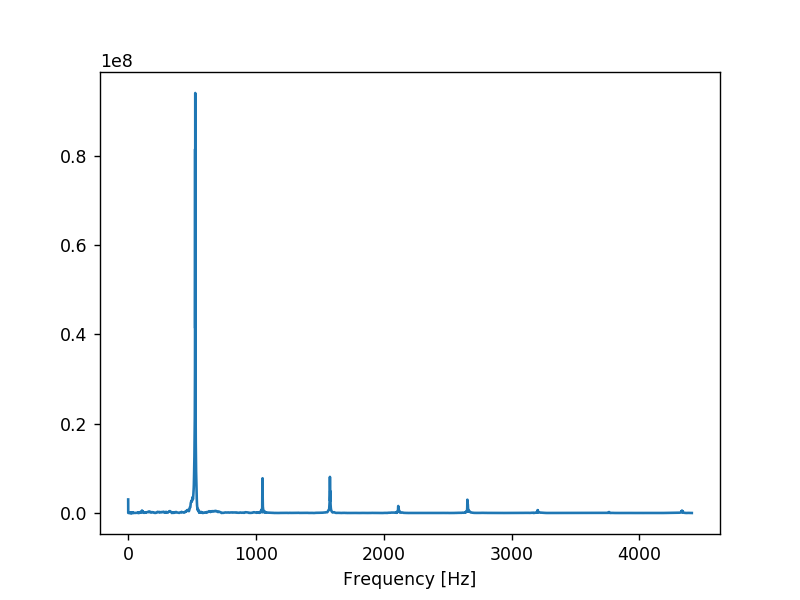

In [46]:
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_xlabel("Frequency [Hz]")

## Exercise 7.4: Fourier filtering & smoothing

<IPython.core.display.Javascript object>


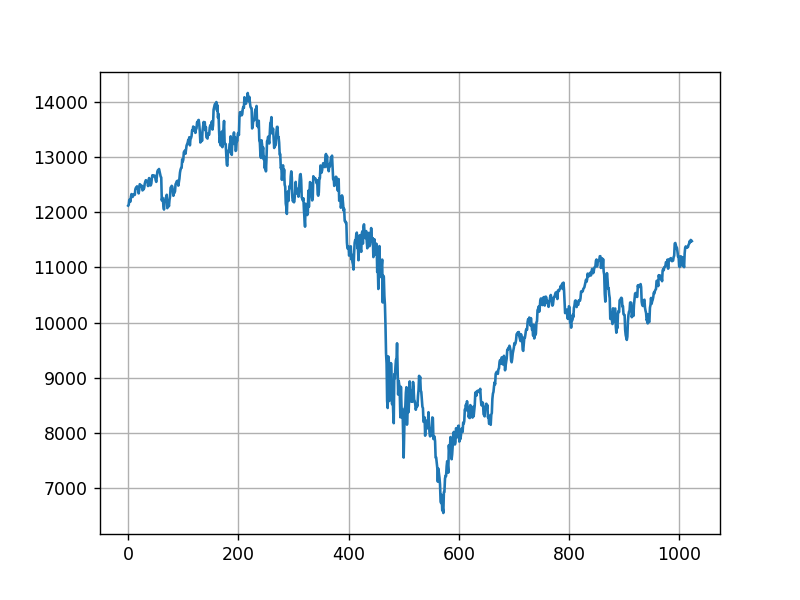

In [53]:
with open("data/dow.txt", 'r') as R:
    data = np.asarray([float(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data)
ax.grid()

<IPython.core.display.Javascript object>


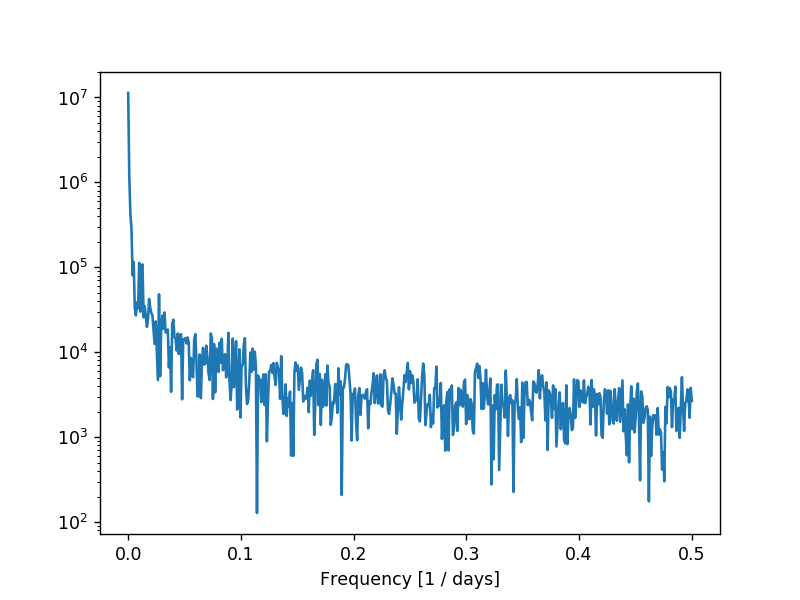

In [61]:
ck =  np.fft.rfft(data)
L = len(data)
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k, np.abs(ck))
ax.set_xlabel("Frequency [1 / days]")
ax.set_yscale("log")
#ax.set_xlim(0, .003)

<IPython.core.display.Javascript object>


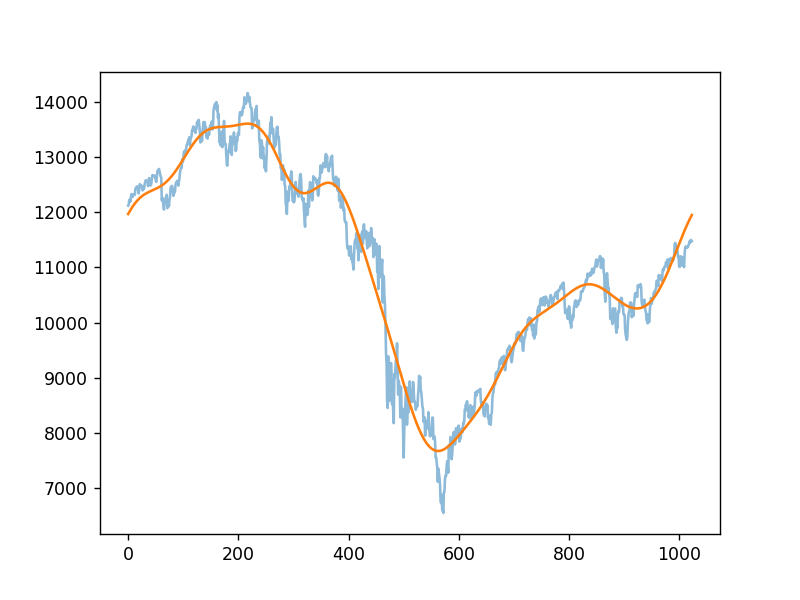

In [69]:
ck =  np.fft.rfft(data)
ck[round(.02 * len(ck)):] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)